In [22]:
# %%capture

# %pip install seaborn pandas numpy

# !jupyter nbextension install jupyter_ascending --user --py && \
# jupyter nbextension enable jupyter_ascending --user --py && \
# jupyter serverextension enable jupyter_ascending --user --py

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     |████████████████████████████████| 7.0 MB 40 kB/s  eta 0:00:01     |████████▍                       | 1.8 MB 587 kB/s eta 0:00:09     |██████████████████████▌         | 4.9 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 46 kB 292 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 48 kB/s  eta 0:00:01     |██████████████████████████▍     | 40 kB 353 kB/s eta 0:00:01


Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns

sns.set_style("darkgrid")
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [3]:
import sys
from os import path
sys.path.append(path.join(".."))

Text(0, 0.5, 'Weight (kg)')

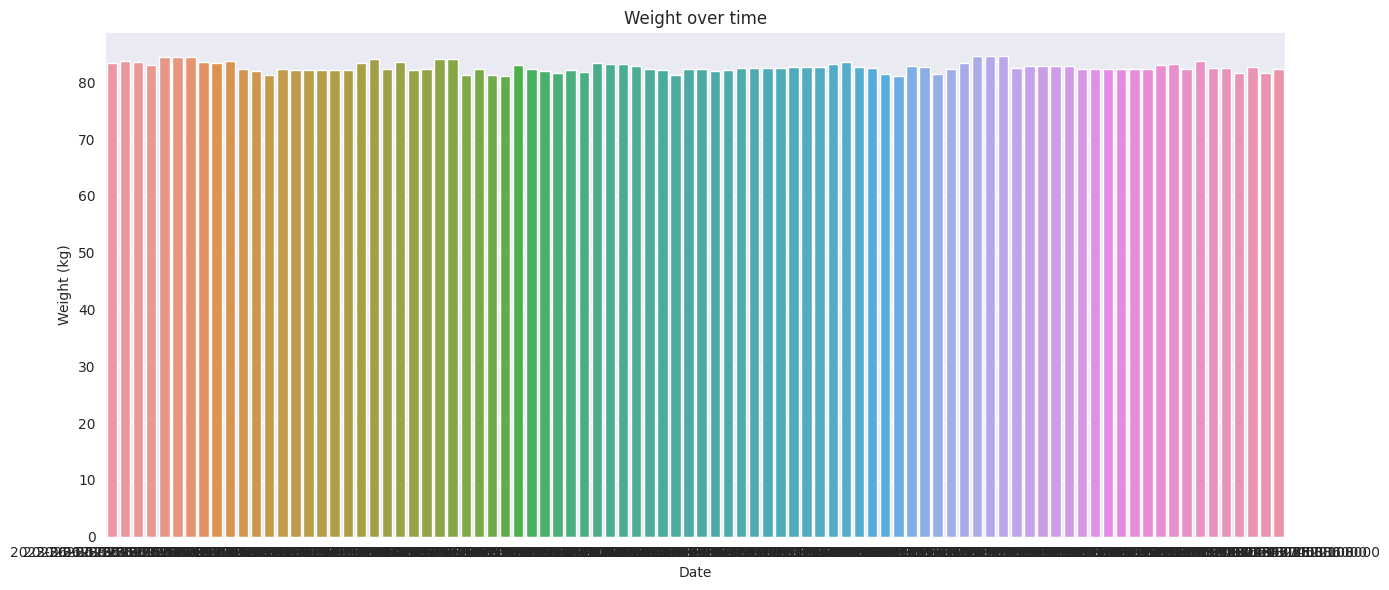

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from mi_scale_2.weight_util import get_saved_weights

df = pd.DataFrame(get_saved_weights())
# df = pd.DataFrame(get_change_trends([7, 14, 30, 90]))
df["dt"] = df["timestamp"].astype("datetime64[ms]")

# df_by_day = df_weights.groupby(df_weights["timestamp"].dt.weekday).count()

plt.figure(figsize=(14,6), tight_layout=True)
ax = sns.barplot(x="dt", y="weight", data=df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Weight over time")
ax.set_xlabel("Date")
ax.set_ylabel("Weight (kg)")

Text(0, 0.5, 'Weight (kg)')

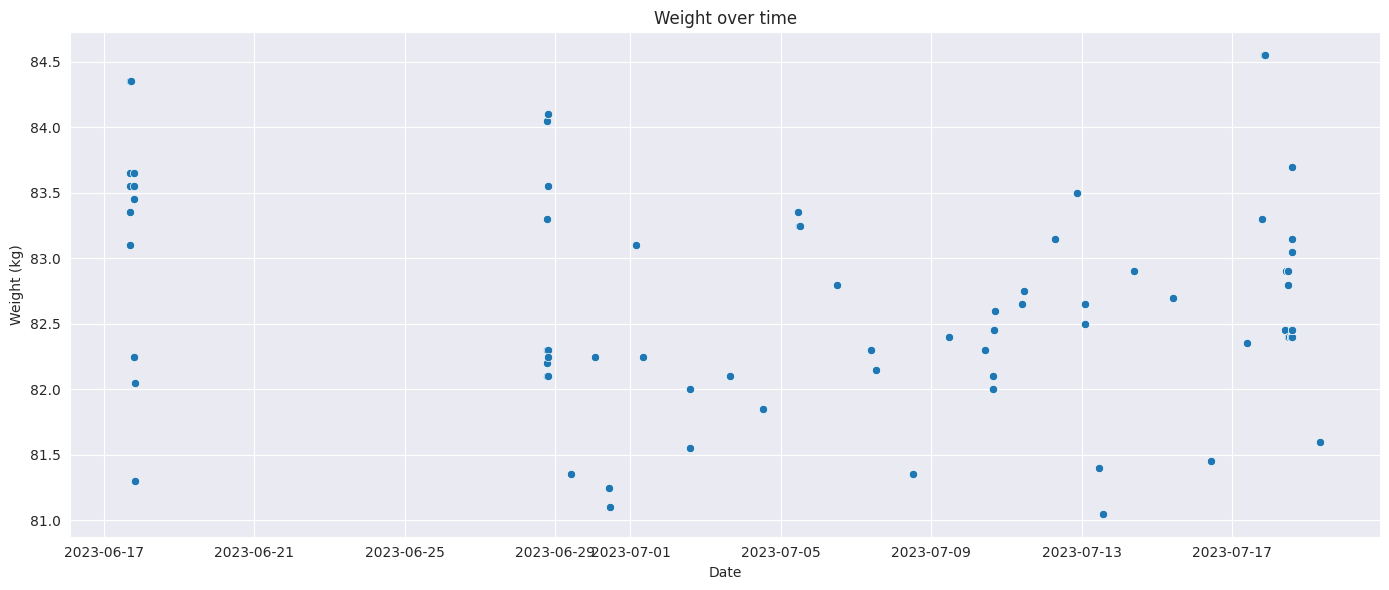

In [19]:
plt.figure(figsize=(14,6), tight_layout=True)
ax = sns.scatterplot(x="timestamp", y="weight", data=df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Weight over time")
ax.set_xlabel("Date")
ax.set_ylabel("Weight (kg)")

In [50]:
df.columns

Index(['weight', 'unit', 'timestamp', 'dt'], dtype='object')

In [59]:
from mi_scale_2.config import CHANGE_TRENDS_DAYS
from mi_scale_2.weight_util import get_saved_weights

df_ = pd.DataFrame(df).sort_values(by="dt", ascending=False).drop(columns=["unit"])
df_["weight"] = df_["weight"].astype(float)
df_["days"] = df_["dt"].rsub(pd.Timestamp('today')).dt.days
df_ = df_.drop(columns=["timestamp"]).groupby('days').mean()
df_["weight_delta"] = df_["weight"].rsub(df_["weight"].iloc[0])
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_) #.drop_duplicates("days", keep="last"))

         weight                      dt  weight_delta
days                                                 
0     81.975000 2023-07-20 14:57:55.572      0.000000
1     82.150000 2023-07-19 16:25:27.781     -0.175000
2     82.679412 2023-07-18 12:52:29.655     -0.704412
3     83.860000 2023-07-17 18:03:04.680     -1.885000
4     81.450000 2023-07-16 10:12:20.251      0.525000
5     82.700000 2023-07-15 10:08:01.174     -0.725000
6     82.900000 2023-07-14 09:17:20.057     -0.925000
7     81.900000 2023-07-13 07:21:29.244      0.075000
8     83.325000 2023-07-12 14:08:57.296     -1.350000
9     82.700000 2023-07-11 10:41:12.253     -0.725000
10    82.350000 2023-07-10 15:12:25.251     -0.375000
11    82.400000 2023-07-09 11:24:40.211     -0.425000
12    81.350000 2023-07-08 12:16:09.229      0.625000
13    82.225000 2023-07-07 11:11:14.784     -0.250000
14    82.800000 2023-07-06 11:42:41.860     -0.825000
15    83.283333 2023-07-05 11:37:38.091     -1.308333
16    81.850000 2023-07-04 1

Text(0, 0.5, 'Weight (kg)')

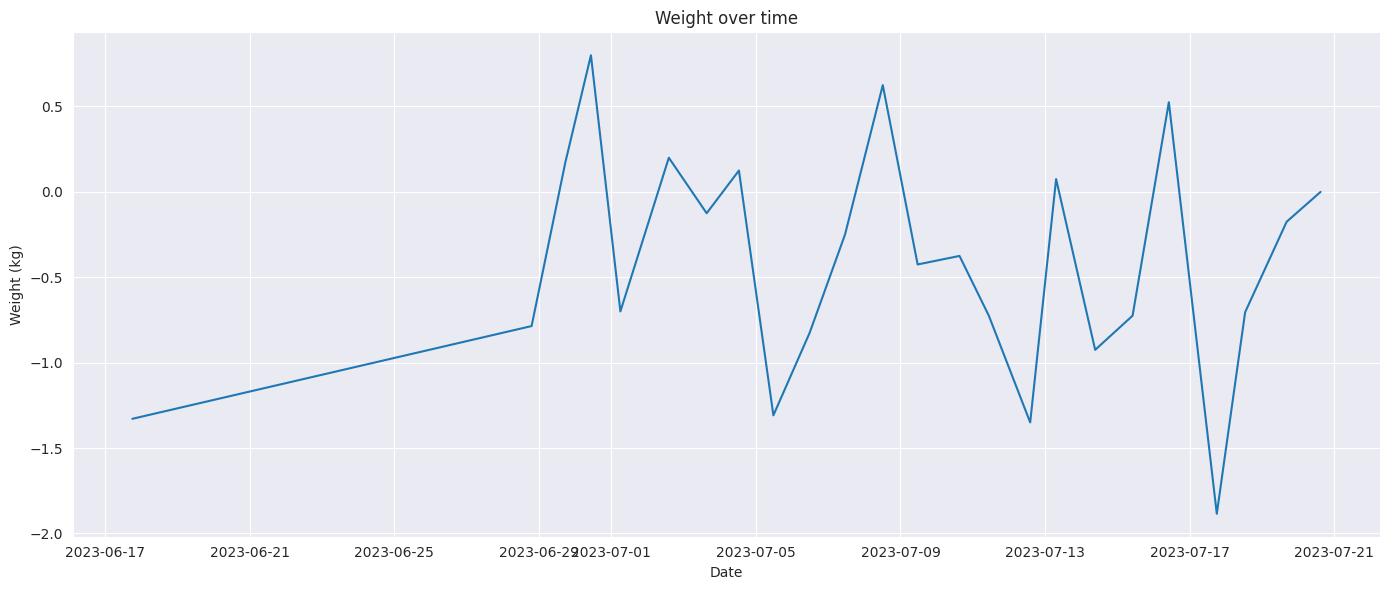

In [60]:
plt.figure(figsize=(14,6), tight_layout=True)
ax = sns.lineplot(x="dt", y="weight_delta", data=df_)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Weight over time")
ax.set_xlabel("Date")
ax.set_ylabel("Weight (kg)")